In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
products = pd.read_csv("products.csv",index_col = 0)

In [3]:
pd.set_option('display.max_colwidth', -1)

In [4]:
products.head()

,Brand,Product,Type,Avg Rating,Number of Reviews,Percentage Would Buy Again
0,MAC Cosmetics,Studio Fix Powder Plus Foundation,Powder,3.7,3938,0.66
1,bareMinerals,Bare Minerals ALL,Powder,2.9,3074,0.44
2,bareMinerals,"Bare Minerals in 1.2, fairly light",Powder,3.5,1152,0.59
3,L'Oreal Paris,Bare Naturale Powdered Mineral Foundation,Powder,3.5,1092,0.62
4,Physicians Formula,Mineral Wear Talc-Free Mineral Loose Powder,Powder,3.6,800,0.65


In [6]:
len(products)

475

In [7]:
brand_list=products["Brand"].tolist()
product_list=products["Product"].tolist()

# Engagement Score of Brands

In [22]:
a=products.groupby("Brand")["Number of Reviews"].mean()
b=products.groupby("Brand")["Avg Rating"].mean()
c=products.groupby("Brand")["Percentage Would Buy Again"].mean()

In [23]:
Brand=pd.DataFrame({"NumberofReviews":a,"AvgRating":b,"Repurchase":c})
Brand.head()

,NumberofReviews,AvgRating,Repurchase
Brand,,,
100% Pure,46.000000,3.60,0.56
AVEDA,124.666667,3.80,0.68
Agnes B.,124.000000,2.70,0.43
Alima Pure,451.000000,4.00,0.72
Almay,315.400000,3.02,0.48


In [207]:
len(Brand)

149

In [24]:
Brand["norm_reviews"]=Brand["NumberofReviews"].apply(lambda x: x/max(Brand["NumberofReviews"]))
Brand["norm_ratings"]=Brand["AvgRating"].apply(lambda x: x/max(Brand["AvgRating"]))
Brand["norm_repurchase"]=Brand["Repurchase"].apply(lambda x: x/max(Brand["Repurchase"]))

In [25]:
Brand.head()

,NumberofReviews,AvgRating,Repurchase,norm_reviews,norm_ratings,norm_repurchase
Brand,,,,,,
100% Pure,46.000000,3.60,0.56,0.046923,0.800000,0.608696
AVEDA,124.666667,3.80,0.68,0.127168,0.844444,0.739130
Agnes B.,124.000000,2.70,0.43,0.126488,0.600000,0.467391
Alima Pure,451.000000,4.00,0.72,0.460048,0.888889,0.782609
Almay,315.400000,3.02,0.48,0.321727,0.671111,0.521739


In [56]:
engagement=[]
for p in Brand.itertuples():
    e_score = .2*p.norm_ratings+.5*p.norm_reviews+.3*p.norm_repurchase
    engagement.append(e_score)
Brand["engagement"]=engagement

In [57]:
percentage=Brand["engagement"].quantile(q=0.9)

In [193]:
top_brand=Brand[Brand["engagement"]>percentage]
top_brand.reset_index(level=0, inplace=True)
top_brand=top_brand.sort_values(by=['engagement'],ascending=False)

In [194]:
top_brand

,Brand,NumberofReviews,AvgRating,Repurchase,norm_reviews,norm_ratings,norm_repurchase,engagement
13,Monistat,900.000000,3.900000,0.750000,0.918055,0.866667,0.815217,0.876926
10,MAC Cosmetics,980.333333,3.600000,0.611333,1.000000,0.800000,0.664493,0.859348
19,Yves Saint Laurent,899.000000,3.700000,0.640000,0.917035,0.822222,0.695652,0.831658
7,Kat Von D,922.000000,3.700000,0.600000,0.940496,0.822222,0.652174,0.830345
2,Bourjois,792.500000,4.050000,0.745000,0.808399,0.900000,0.809783,0.827134
5,EstÃ©e Lauder,727.000000,3.775000,0.640000,0.741584,0.838889,0.695652,0.747266
0,Alima Pure,451.000000,4.000000,0.720000,0.460048,0.888889,0.782609,0.642584
11,MISSHA,445.000000,4.033333,0.723333,0.453927,0.896296,0.786232,0.642092
6,Everyday Minerals,473.500000,3.800000,0.680000,0.482999,0.844444,0.739130,0.632128
15,Palladio Beauty,389.000000,4.100000,0.770000,0.396804,0.911111,0.836957,0.631711


Text(0.5,1,'Top Brands')

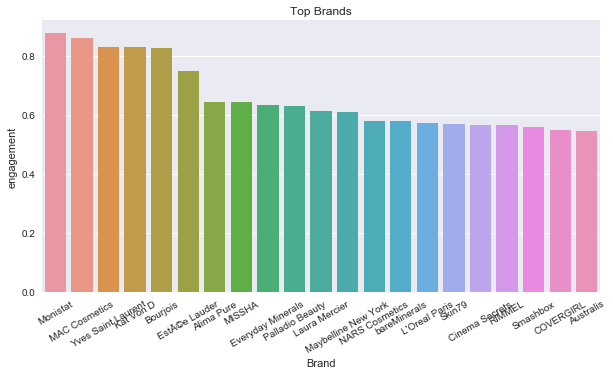

In [195]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.barplot(top_brand["Brand"],top_brand["engagement"])
p.set_xticklabels(top_brand["Brand"].tolist(),rotation=30)
p.set_title("Top Brands")

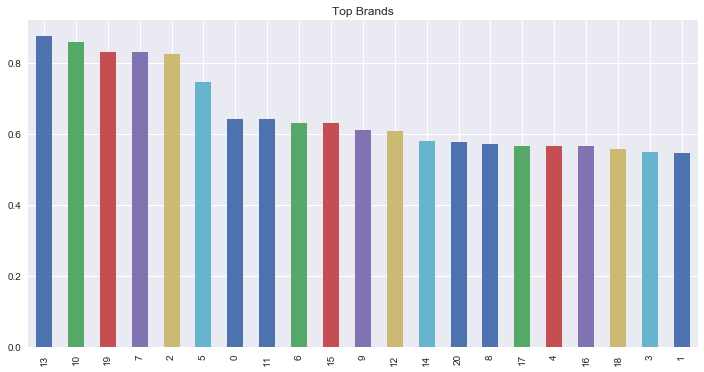

In [196]:
top_brand["engagement"].plot(kind='bar',figsize=(12,6),title="Top Brands" )

# Engagement Score of products

In [11]:
products["norm_reviews"]=products["Number of Reviews"].apply(lambda x: x/max(products["Number of Reviews"]))
products["norm_ratings"]=products["Avg Rating"].apply(lambda x: x/max(products["Avg Rating"]))
products["norm_repurchase"]=products["Percentage Would Buy Again"].apply(lambda x: x/max(products["Percentage Would Buy Again"]))

In [12]:
products.head()

,Brand,Product,Type,Avg Rating,Number of Reviews,Percentage Would Buy Again,norm_reviews,norm_ratings,norm_repurchase
0,MAC Cosmetics,Studio Fix Powder Plus Foundation,Powder,3.7,3938,0.66,1.000000,0.787234,0.717391
1,bareMinerals,Bare Minerals ALL,Powder,2.9,3074,0.44,0.780599,0.617021,0.478261
2,bareMinerals,"Bare Minerals in 1.2, fairly light",Powder,3.5,1152,0.59,0.292534,0.744681,0.641304
3,L'Oreal Paris,Bare Naturale Powdered Mineral Foundation,Powder,3.5,1092,0.62,0.277298,0.744681,0.673913
4,Physicians Formula,Mineral Wear Talc-Free Mineral Loose Powder,Powder,3.6,800,0.65,0.203149,0.765957,0.706522


In [13]:
engagement=[]
for p in products.itertuples():
    e_score = .2*p.norm_ratings+.5*p.norm_reviews+.3*p.norm_repurchase
    engagement.append(e_score)
products["engagement"]=engagement

In [19]:
products.head()

,Brand,Product,Type,Avg Rating,Number of Reviews,Percentage Would Buy Again,norm_reviews,norm_ratings,norm_repurchase,engagement
0,MAC Cosmetics,Studio Fix Powder Plus Foundation,Powder,3.7,3938,0.66,1.000000,0.787234,0.717391,0.872664
1,bareMinerals,Bare Minerals ALL,Powder,2.9,3074,0.44,0.780599,0.617021,0.478261,0.657182
2,bareMinerals,"Bare Minerals in 1.2, fairly light",Powder,3.5,1152,0.59,0.292534,0.744681,0.641304,0.487595
3,L'Oreal Paris,Bare Naturale Powdered Mineral Foundation,Powder,3.5,1092,0.62,0.277298,0.744681,0.673913,0.489759
4,Physicians Formula,Mineral Wear Talc-Free Mineral Loose Powder,Powder,3.6,800,0.65,0.203149,0.765957,0.706522,0.466722


In [186]:
percentage=products["engagement"].quantile(q=0.98)

In [191]:
top_products=products[products["engagement"]>percentage]
#top_products.reset_index(level=0, inplace=True)
top_products=top_products.sort_values(by=['engagement'],ascending=False)
top_products

,Brand,Product,Type,Avg Rating,Number of Reviews,Percentage Would Buy Again,norm_reviews,norm_ratings,norm_repurchase,engagement
0,MAC Cosmetics,Studio Fix Powder Plus Foundation,Powder,3.7,3938,0.66,1.000000,0.787234,0.717391,0.872664
250,L'Oreal Paris,True Match Super-Blendable Makeup SPF 17,Liquid,3.3,3203,0.56,0.813357,0.702128,0.608696,0.729713
251,MAC Cosmetics,Studio Fix Fluid SPF 15,Liquid,3.5,2956,0.58,0.750635,0.744681,0.630435,0.713384
1,bareMinerals,Bare Minerals ALL,Powder,2.9,3074,0.44,0.780599,0.617021,0.478261,0.657182
254,EstÃ©e Lauder,Double Wear Stay in Place Makeup,Liquid,4.0,1660,0.71,0.421534,0.851064,0.771739,0.612501
253,NARS Cosmetics,Sheer Glow Foundation,Liquid,3.7,1851,0.62,0.470036,0.787234,0.673913,0.594638
255,MAC Cosmetics,Studio Face and Body Foundation,Liquid,4.0,1442,0.74,0.366176,0.851064,0.804348,0.594605
325,REVLON,ColorStay Whipped Creme Makeup,CrÃ¨me,3.9,1380,0.69,0.350432,0.829787,0.750000,0.566173
175,Laura Mercier,Tinted Moisturizer SPF 20,Tinted Moisturizer,3.8,1396,0.64,0.354495,0.808511,0.695652,0.547645
256,COVERGIRL,Outlast Stay Fabulous 3-In-1 Foundation,Liquid,3.8,1296,0.67,0.329101,0.808511,0.728261,0.544731


Text(0.5,1,'Top products')

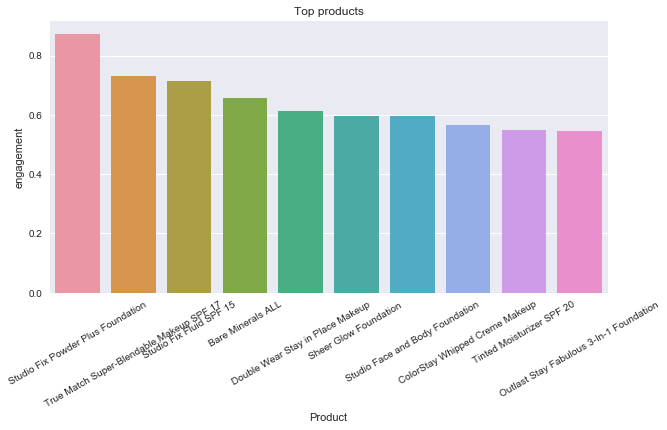

In [192]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.barplot(top_products["Product"],top_products["engagement"])
p.set_xticklabels(top_products["Product"].tolist(),rotation=30)
p.set_title("Top products")

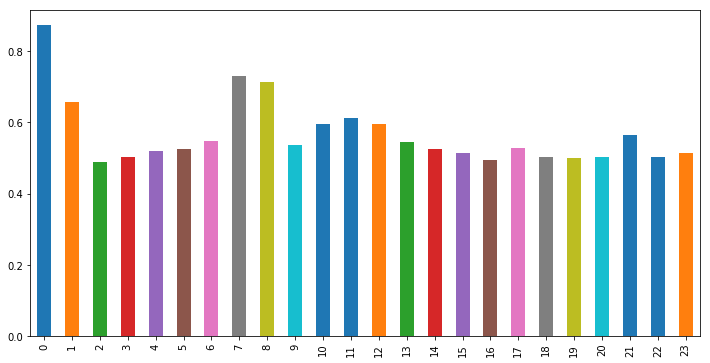

In [42]:
top_products["engagement"].plot(kind='bar',figsize=(12,6))

# insight

In [348]:
x=Brand[Brand["engagement"]>Brand["engagement"].quantile(q=0.75)]
brand_x=x[x["norm_repurchase"]<Brand["norm_repurchase"].quantile(q=0.25)]
brand_x.reset_index(level=0, inplace=True)
brand_x

,Brand,NumberofReviews,AvgRating,Repurchase,norm_reviews,norm_ratings,norm_repurchase,engagement
0,Garnier,375.400000,3.280000,0.546000,0.382931,0.728889,0.593478,0.515287
1,L'Oreal Paris,503.315789,3.247368,0.524737,0.513413,0.721637,0.570366,0.572144
2,Maybelline New York,558.846154,3.269231,0.549231,0.570057,0.726496,0.596990,0.609425
3,NARS Cosmetics,470.428571,3.528571,0.558571,0.479866,0.784127,0.607143,0.578901
4,Smashbox,444.750000,3.475000,0.540000,0.453672,0.772222,0.586957,0.557368
5,bareMinerals,514.750000,3.250000,0.525625,0.525077,0.722222,0.571332,0.578382
6,benefit Cosmetics,462.500000,3.100000,0.472000,0.471778,0.688889,0.513043,0.527580


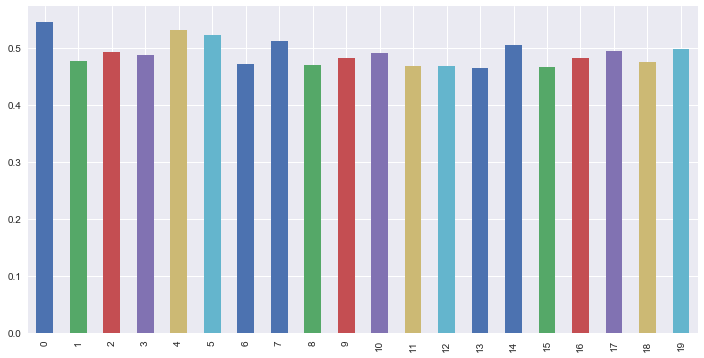

In [213]:
brand_x["engagement"].plot(kind='bar',figsize=(12,6))
brand_x["norm_reviews"].plot(kind='bar',figsize=(12,6))

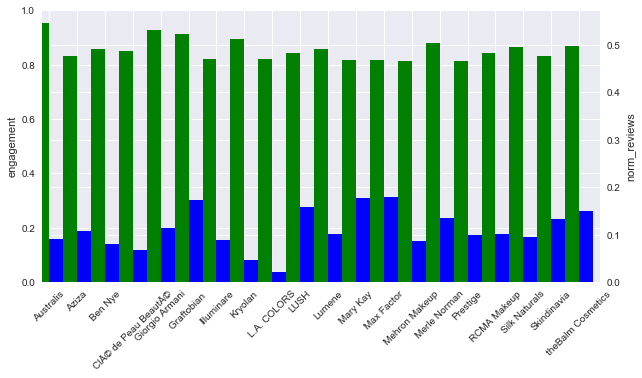

In [225]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

brand_x.engagement.plot(kind='bar', color='green', ax=ax2,  position=1)
brand_x.norm_reviews.plot(kind='bar', color='blue', ax=ax2, position=0)

ax.set_ylabel('engagement')
ax2.set_ylabel('norm_reviews')

ax.set_xticklabels(brand_x["Brand"].tolist(),rotation=45)

plt.show()

In [215]:
import matplotlib.pyplot as plt

In [205]:
brand_x["Brand"].tolist()

['Australis',
 'Aziza',
 'Ben Nye',
 'ClÃ© de Peau BeautÃ©',
 'Giorgio Armani',
 'Graftobian ',
 'Illuminare',
 'Kryolan',
 'L.A. COLORS',
 'LUSH',
 'Lumene',
 'Mary Kay',
 'Max Factor',
 'Mehron Makeup',
 'Merle Norman',
 'Prestige',
 'RCMA Makeup',
 'Silk Naturals',
 'Skindinavia',
 'theBalm Cosmetics']

In [208]:
len(products[products["Brand"].isin(brand_x["Brand"].tolist())])/len(products)

0.07157894736842105

In [211]:
len(brand_x["Brand"].tolist())/len(Brand)

0.1342281879194631

These brands have relative higher engagement scores, but its number of reviews is less than others. After checking how many foundation products they have, we find that their product lines should be expand, because consumers are satisfied with their exisiting product and want to repurchase. If they can develop more product lines and keep the same qualification, their brand will be more populare.

# Replace products to brands

In [240]:
reviews = pd.read_csv("reviews.csv",index_col = 0)
reviews.head()

,Type,Product,Rating,Username,Date,Age,Skin,Hair,Eyes,Review
0,Powder,Studio Fix Powder Plus Foundation,4,Marlen86,on 11/25/2018 4:35:00 PM,30-35,"Oily, Fair-Medium, Not Sure","Brown, Other, Other",Brown,"Nice pigmented powder, especially to cover skin imperfections."
1,Powder,Studio Fix Powder Plus Foundation,5,babypuggies,on 10/31/2018 9:42:00 AM,19-24,"Combination, Medium, Warm","Blond, Straight, Medium",Brown,"This has become my go-to foundation now! My oily dehydrated skin went haywire this year. All my trusted foundations, even purportedly hydrating Serum Foundation from The Ordinary, were too dry and cakey on me despite me rationing the tiniest amount. I began to avoid matte foundations like the plague.This foundation, however, gave me the most beautiful finish with medium coverage. Yes, it was matte, but for the first time in a while, it did not cake up or break down. I like to set it with plain rosewater for a more satin finish. The staying power was marvelous, lasting 12 hours without losing a tincture of coverage. Bonus points for being much easier to apply as opposed to a liquid foundation! It is also incredibly versatile.For lighter coverage, I use a flat top powder brush and buff it all over my face. For medium coverage, I pick up some power on the same brush, spritz a little rosewater on the brush, and buff it into my skin. This does not affect the finish of the product at all; just the coverage itself.If you're looking for oil control, this isn't your bag of chips. But then again, my skin is astoundingly oily, and I start to get shiny about 2 hours after application no matter what I use. So maybe it is just me, and not this powder."
2,Powder,Studio Fix Powder Plus Foundation,4,ChristopherCupcakes,on 10/22/2018 1:28:00 PM,44-55,"Combination, Medium, Neutral","Other, Straight, Medium",Green,"This is an amazing powder foundation that leaves skin beautifully finished, matte and looking flawless. You can use this alone and it has a full coverage foundation or you can build it up and layer it over a liquid foundation to help set it and get more coverage. I'm a light skin and usually wear medium or natural medium foundations and I'm an NW 25 in this."
3,Powder,Studio Fix Powder Plus Foundation,4,congolesedoll,on 10/9/2018 4:39:00 PM,19-24,"Very Oily, Dark, Not Sure","Blond, Other, Other",Brown,Amazing powder that keeps you MATTE and keeps the makeup in place
4,Powder,Studio Fix Powder Plus Foundation,5,manowaris,on 10/9/2018 2:58:00 PM,19-24,"Acne-prone, Fair, Neutral","Brown, Wavy, Coarse",Blue,I bought this powder a lot. I love it. It has medium + coverage. It doesn\xe2\x80\x99t have the most natural look on me but it is ok. Don\xe2\x80\x99t use it around my eyes aa it\xe2\x80\x99s makes me look 100


In [241]:
len(reviews)

132672

# Lift

In [246]:
reviews.replace(product_list,brand_list,inplace=True)

In [247]:
reviews["prod_age"]=reviews["Age"]+" "+reviews["Product"]

In [276]:
top_reviews=reviews[reviews["Product"].isin(top_brand["Brand"])==True]

In [277]:
top_brand["Brand"]

13    Monistat           
10    MAC Cosmetics      
19    Yves Saint Laurent 
7     Kat Von D          
2     Bourjois           
5     EstÃ©e Lauder      
0     Alima Pure         
11    MISSHA             
6     Everyday Minerals  
15    Palladio Beauty    
9     Laura Mercier      
12    Maybelline New York
14    NARS Cosmetics     
20    bareMinerals       
8     L'Oreal Paris      
17    Skin79             
4     Cinema Secrets     
16    RIMMEL             
18    Smashbox           
3     COVERGIRL          
1     Australis          
Name: Brand, dtype: object

In [249]:
len(top_reviews)

72661

In [250]:
age=reviews[reviews["Age"]!='Unknown']
age_list=age["Age"].sort_values().unique()

In [251]:
age_list

array(['18 & Under', '19-24', '25-29', '30-35', '36-43', '44-55',
       '56 & Over'], dtype=object)

In [323]:
unique_products=top_brand["Brand"].unique().tolist()[:7]
top_reviews=reviews[reviews["Product"].isin(unique_products)==True]


In [324]:
unique_products
product_combos = []
for i in range (len(unique_products)):
    for j in range (len(age_list)):
        product_combo = (unique_products[i], age_list[j])
        product_combos.append(product_combo)

In [325]:
unique_products

['Monistat',
 'MAC Cosmetics',
 'Yves Saint Laurent',
 'Kat Von D',
 'Bourjois',
 'EstÃ©e Lauder',
 'Alima Pure']

In [326]:
top_reviews.shape

(22366, 11)

In [327]:
product_combo_dict = {}
for bc in product_combos:
    product_combo_dict[bc] = 0

In [328]:
for bc in product_combos:
    for c in reviews["prod_age"]:
        product1 = bc[0]
        product2 = bc[1]
        if product1 in c and product2 in c:
            product_combo_dict[bc] += 1

In [329]:
product_combo_dict

{('Monistat', '18 & Under'): 50,
 ('Monistat', '19-24'): 288,
 ('Monistat', '25-29'): 190,
 ('Monistat', '30-35'): 145,
 ('Monistat', '36-43'): 110,
 ('Monistat', '44-55'): 91,
 ('Monistat', '56 & Over'): 19,
 ('MAC Cosmetics', '18 & Under'): 2129,
 ('MAC Cosmetics', '19-24'): 5905,
 ('MAC Cosmetics', '25-29'): 3239,
 ('MAC Cosmetics', '30-35'): 1814,
 ('MAC Cosmetics', '36-43'): 938,
 ('MAC Cosmetics', '44-55'): 435,
 ('MAC Cosmetics', '56 & Over'): 73,
 ('Yves Saint Laurent', '18 & Under'): 80,
 ('Yves Saint Laurent', '19-24'): 312,
 ('Yves Saint Laurent', '25-29'): 192,
 ('Yves Saint Laurent', '30-35'): 149,
 ('Yves Saint Laurent', '36-43'): 83,
 ('Yves Saint Laurent', '44-55'): 48,
 ('Yves Saint Laurent', '56 & Over'): 10,
 ('Kat Von D', '18 & Under'): 131,
 ('Kat Von D', '19-24'): 339,
 ('Kat Von D', '25-29'): 177,
 ('Kat Von D', '30-35'): 135,
 ('Kat Von D', '36-43'): 74,
 ('Kat Von D', '44-55'): 51,
 ('Kat Von D', '56 & Over'): 9,
 ('Bourjois', '18 & Under'): 319,
 ('Bourjois', 

In [330]:
unique_products_dict = {}
for b in unique_products:
    for c in reviews["prod_age"]:
        if b in c:
            if b in unique_products_dict:
                unique_products_dict[b] += 1
            else:
                unique_products_dict[b] = 1

In [331]:
age_dict = {}
for b in age_list:
    for c in reviews["prod_age"]:
        if b in c:
            if b in age_dict:
                age_dict[b] += 1
            else:
                age_dict[b] = 1

In [332]:
age_dict

{'18 & Under': 18278,
 '19-24': 43471,
 '25-29': 26929,
 '30-35': 19544,
 '36-43': 12874,
 '44-55': 8099,
 '56 & Over': 1951}

In [333]:
unique_products_dict

{'Monistat': 900,
 'MAC Cosmetics': 14703,
 'Yves Saint Laurent': 900,
 'Kat Von D': 921,
 'Bourjois': 1585,
 'EstÃ©e Lauder': 2906,
 'Alima Pure': 451}

In [334]:
tot_number = top_reviews.shape[0]

In [335]:
tot_number

22366

In [336]:
lifts_dict = {}
for a in product_combo_dict:
    if a[0] == a[1]:
        lift = 0
    else:
        combo_count = product_combo_dict[a]
        attri1_count = unique_products_dict[a[0]]
        attri2_count = age_dict[a[1]]
        lift = (tot_number * combo_count) / (attri1_count * attri2_count)
    lifts_dict[a] = lift

In [337]:
age_dict

{'18 & Under': 18278,
 '19-24': 43471,
 '25-29': 26929,
 '30-35': 19544,
 '36-43': 12874,
 '44-55': 8099,
 '56 & Over': 1951}

In [338]:
matrix = []
row = -1
current_attri = ''
for combo in lifts_dict:
    attri = combo[0]
    lift = lifts_dict[combo]
    if attri == current_attri:
        matrix[row].append(lift)
    else:
        row += 1
        current_attri = attri
        matrix.append([])
        matrix[row].append(lift)

In [339]:
len(matrix)

7

In [340]:
simi = pd.DataFrame(matrix, columns=unique_products,index=age_list)

In [341]:
len(unique_products)

7

In [342]:
simi

,Monistat,MAC Cosmetics,Yves Saint Laurent,Kat Von D,Bourjois,EstÃ©e Lauder,Alima Pure
18 & Under,0.067981,0.164641,0.175339,0.184374,0.212337,0.279226,0.242015
19-24,0.177186,0.206634,0.182967,0.141191,0.110834,0.081703,0.056918
25-29,0.108769,0.178361,0.177185,0.189460,0.160218,0.147284,0.127376
30-35,0.174049,0.189378,0.159618,0.167745,0.139588,0.152921,0.112025
36-43,0.246275,0.204828,0.147247,0.129241,0.120570,0.085374,0.101258
44-55,0.126745,0.166957,0.173485,0.188632,0.187121,0.185309,0.220914
56 & Over,0.032558,0.125489,0.217307,0.210609,0.261943,0.257176,0.203350


In [343]:
#dissimilarity
dis=matrix
for i in range (len(matrix)):
    for j in range (len(matrix[i])):
        if matrix[i][j] != 0:
            dis[i][j] = 1/matrix[i][j]

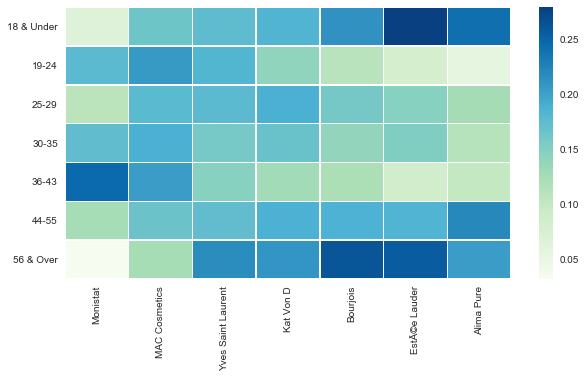

In [344]:
g=sns.heatmap(simi, linewidth=0.5,cmap = 'GnBu')


Findings: we find that, for the top 7 most popular brands, age range 30-35 has the highet similarity with L'Oreal Paris，which means L'Oreal is more popular in people in age 30-35. It is beyond our prediction, because L'Oreal is 

# LDA

In [146]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
import spacy
#nlp = spacy.load('english')
nltk.download('words')
stopwords = stopwords.words('english')[:]
text=top_reviews["Review"].tolist()

[nltk_data] Downloading package words to /Users/hongfan/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [107]:
v=set(nltk.corpus.words.words())

In [108]:
words=[]
t = ''
for i in text:
    word=re.compile(r'[^a-zA-Z]').split(i)
    a=[]
    for i in word:
        if i in v:
            if i not in stopwords and len(i)>2 :
                a.append(i)
    a=" ".join(a) 
    doc = nlp(a)
    for token in doc:
        t = t+" "+token.lemma_
    words.append(t)

NameError: name 'nlp' is not defined

In [ ]:
words[:5]

In [97]:
len(words)

15568

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
# init count vectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                            )

In [80]:
word_vectorized = vectorizer.fit_transform(words)

In [91]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5, random_state = 0)

In [92]:
lda.fit(word_vectorized)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=5, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [93]:
# column names
topicnames = ["Topic" + str(i) for i in range(1, lda.n_components + 1)]

# weights of each keyword in each topic

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda.components_.T)

# Assign Column and Index
df_topic_keywords.index = vectorizer.get_feature_names()
df_topic_keywords.columns = topicnames

# View
df_topic_keywords

,Topic1,Topic2,Topic3,Topic4,Topic5
aback,0.214552,0.562658,0.230470,0.205135,1.871418
abandon,0.207925,2.267863,0.205549,0.206907,0.212045
abandoned,1.508657,0.200009,0.203321,0.294334,0.231567
abide,0.200001,0.200008,0.200270,0.689502,0.343697
ability,20.499086,0.205019,0.205869,3.364958,13.395875
able,111.613970,0.509867,63.915574,143.895087,33.322575
abnormal,0.212585,0.212969,3.281953,0.200463,0.201617
abolish,0.203847,0.202088,0.201169,0.202467,1.037562
abominable,0.202599,0.828770,0.200000,0.200535,0.201574
abrasive,0.207173,0.200033,0.200530,1.405329,0.207880


In [94]:
# throw this onto a csv
df_topic_keywords.to_csv("wordstotopics2.csv")

In [95]:
topic1 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic1'], ascending = False).head(10).index.values)
topic1.columns = ["Topic1"]
topic1

,Topic1
0,skin
1,oily
2,face
3,day
4,oil
5,product
6,acne
7,tried
8,foundation
9,try


In [96]:
topic2 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic2'], ascending = False).head(10).index.values)
topic2.columns = ["Topic2"]
topic2

,Topic2
0,pump
1,place
2,visible
3,sun
4,glide
5,silk
6,low
7,benefit
8,badly
9,bother


In [193]:
# topic 3
topic3 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic3'], ascending = False).head(10).index.values)
topic3.columns = ["Topic3"]
topic3

,Topic3
0,primer
1,product
2,like
3,skin
4,really
5,foundation
6,face
7,use
8,make
9,feel


We decided to name this topic "ecosystem"

In [192]:
# topic 4
topic4 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic4'], ascending = False).head(10).index.values)
topic4.columns = ["Topic4"]
topic4

,Topic4
0,foundation
1,skin
2,powder
3,use
4,coverage
5,look
6,like
7,product
8,love
9,brush


We decided to name this topic "Wildlife"

In [189]:
# topic 5
topic5 = pd.DataFrame(df_topic_keywords.sort_values(by = ['Topic5'], ascending = False).head(10).index.values)
topic5.columns = ["Topic5"]
topic5

,Topic5
0,color
1,shade
2,match
3,light
4,mineral
5,yellow
6,dark
7,pink
8,colors
9,concealer
